In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random


In [53]:
df = pd.read_csv("train.csv")

In [54]:
df.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [55]:
df.head(5)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [56]:
df.shape

(10884, 30)

In [57]:
df.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')

In [58]:
for i in range(len(df.columns)):
    print([i,df.columns[i]])

[0, 'bedroom']
[1, 'bathrooms']
[2, 'area']
[3, 'furnishing']
[4, 'avalable_for']
[5, 'address']
[6, 'floor_number']
[7, 'facing']
[8, 'floor_type']
[9, 'gate_community']
[10, 'corner_pro']
[11, 'parking']
[12, 'wheelchairadption']
[13, 'petfacility']
[14, 'aggDur']
[15, 'noticeDur']
[16, 'lightbill']
[17, 'powerbackup']
[18, 'propertyage']
[19, 'no_room']
[20, 'pooja_room']
[21, 'study_room']
[22, 'others']
[23, 'servant_room']
[24, 'store_room']
[25, 'maintenance_amt']
[26, 'brok_amt']
[27, 'deposit_amt']
[28, 'mnt_amt']
[29, 'rent']


In [59]:
df["total_rooms"]=0
rooms = [i for i in df.columns if "room" in i and "bath" not in i]  


df["total_rooms"] = df["bedroom"]+df["no_room"]+df["pooja_room"]+df["study_room"]+df["store_room"]+df["servant_room"]
rooms.remove("total_rooms")
df.drop(rooms,axis=1,inplace=True)
df.shape

(10884, 25)

In [60]:
for i in range(len(df.columns)):
    print([i,df.columns[i]])

[0, 'bathrooms']
[1, 'area']
[2, 'furnishing']
[3, 'avalable_for']
[4, 'address']
[5, 'floor_number']
[6, 'facing']
[7, 'floor_type']
[8, 'gate_community']
[9, 'corner_pro']
[10, 'parking']
[11, 'wheelchairadption']
[12, 'petfacility']
[13, 'aggDur']
[14, 'noticeDur']
[15, 'lightbill']
[16, 'powerbackup']
[17, 'propertyage']
[18, 'others']
[19, 'maintenance_amt']
[20, 'brok_amt']
[21, 'deposit_amt']
[22, 'mnt_amt']
[23, 'rent']
[24, 'total_rooms']


In [61]:
index_to_drop = [4,6,8,9,14,15,18,19,20,22]
len(index_to_drop)

10

In [62]:
col_to_drop = []
for index in range(len(df.columns)):
    if index in index_to_drop:
        col_to_drop.append(df.columns[index])
col_to_drop


['address',
 'facing',
 'gate_community',
 'corner_pro',
 'noticeDur',
 'lightbill',
 'others',
 'maintenance_amt',
 'brok_amt',
 'mnt_amt']

In [63]:
df2= df.drop(col_to_drop,axis=1)
print(df2.shape)
df2.head(5)

(10884, 15)


,bathrooms,area,furnishing,avalable_for,floor_number,floor_type,parking,wheelchairadption,petfacility,aggDur,powerbackup,propertyage,deposit_amt,rent,total_rooms
0,2,1050.0,Unfurnished,All,5,Marble,0,None,None,11,2,5 to 10 Year Old,3,20000.0,3
1,2,760.0,Unfurnished,All,5,Vitrified,2,None,None,11,2,1 to 5 Year Old,40000,14000.0,3
2,3,0.0,Semifurnished,All,1,Vitrified,1,None,None,11,2,1 to 5 Year Old,60000,22999.0,3
3,1,628.0,Furnished,Family Only,3,Mosaic,1,None,None,11,0,10+ Year Old,40000,13000.0,2
4,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",6,Polished concrete,1,None,None,12,1,1 to 5 Year Old,20,7500.0,3


In [64]:
df2.isnull().sum()

bathrooms            0
area                 0
furnishing           0
avalable_for         0
floor_number         0
floor_type           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
powerbackup          0
propertyage          0
deposit_amt          0
rent                 0
total_rooms          0
dtype: int64

In [65]:
#Print the numeric/float features and object/string type variables

num_cols = [feature for feature in df2.columns if df2[feature].dtypes!='O']
cat_cols = [feature for feature in df2.columns if df2[feature].dtypes=='O']

In [66]:
print("The numeric columns are : {}".format(num_cols)+"\n"*2+"The categorical columns are : {}".format(cat_cols))

The numeric columns are : ['bathrooms', 'area', 'floor_number', 'parking', 'aggDur', 'powerbackup', 'deposit_amt', 'rent', 'total_rooms']

The categorical columns are : ['furnishing', 'avalable_for', 'floor_type', 'wheelchairadption', 'petfacility', 'propertyage']


In [67]:
print("The numeric columns are : ",num_cols,"\n"*2,"The categorical columns are : ",cat_cols)

The numeric columns are :  ['bathrooms', 'area', 'floor_number', 'parking', 'aggDur', 'powerbackup', 'deposit_amt', 'rent', 'total_rooms'] 

 The categorical columns are :  ['furnishing', 'avalable_for', 'floor_type', 'wheelchairadption', 'petfacility', 'propertyage']


In [68]:
df2.area.describe()

count    10884.000000
mean       528.558560
std        930.460935
min          0.000000
25%          0.000000
50%        510.000000
75%        840.000000
max      72775.000000
Name: area, dtype: float64

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

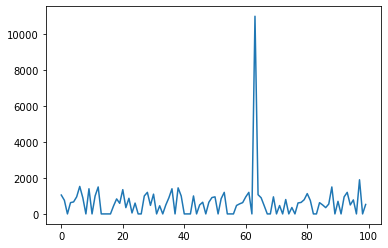

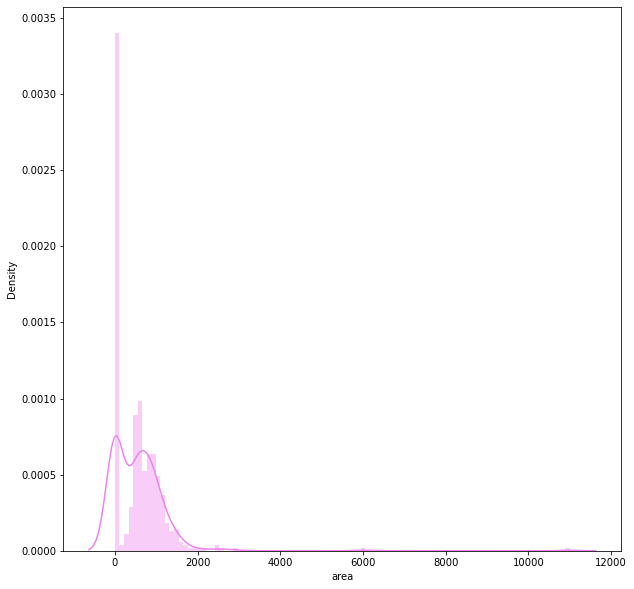

In [69]:
plt.plot(df2.area[0:100])
plt.figure(figsize=(10,10))
sb.distplot(df.area[0:500],color="violet",bins=100,kde=True)

In [70]:
# Extreme point 3 std away from mean considered as upper limit
#area
upper_limit = np.mean(df.area)+3*np.std(df.area)
lower_limit = np.percentile(df.area,45)
print(lower_limit,upper_limit)

450.0 3319.813127884223


In [71]:
df2 = df2[(df2["area"]>lower_limit) & (df2["area"]<upper_limit)]
df2.shape

(5953, 15)

In [72]:
df2.isnull().sum()

bathrooms            0
area                 0
furnishing           0
avalable_for         0
floor_number         0
floor_type           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
powerbackup          0
propertyage          0
deposit_amt          0
rent                 0
total_rooms          0
dtype: int64

In [73]:
#for aggr dur
upper_limit = np.percentile(df2.aggDur,95)
lower_limit = 1
df2 = df2[(df2.aggDur>=1) &(df2.aggDur<upper_limit)]
df2.shape


(3917, 15)

In [74]:
'''plt.plot(df2.deposit_amt[0:100])
plt.figure(figsize=(10,10))
sb.distplot(df.deposit_amt[0:500],color="violet",bins=100,kde=True)'''

'plt.plot(df2.deposit_amt[0:100])\nplt.figure(figsize=(10,10))\nsb.distplot(df.deposit_amt[0:500],color="violet",bins=100,kde=True)'

In [75]:
'''df2.deposit_amt.describe()'''

'df2.deposit_amt.describe()'

In [76]:
#deposit amount
upper_limit = np.mean(df2.deposit_amt)+3*np.std(df2.deposit_amt)
lower_limit = 1100
print(lower_limit,upper_limit)
df2=df2[(df2.deposit_amt>1100) & (df2.deposit_amt<upper_limit)]
df2.shape

1100 182580.0772654721


(2884, 15)

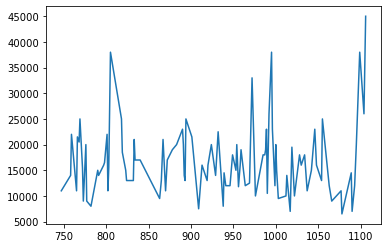

In [77]:
plt.plot(df2.rent[200:300])

In [78]:
df2.rent.describe()

count     2884.000000
mean     17040.886616
std       7406.658002
min       2500.000000
25%      12000.000000
50%      16000.000000
75%      20000.000000
max      67000.000000
Name: rent, dtype: float64

In [79]:
#rent
lower_limit = np.mean(df2.rent) - 2*np.std(df2.rent)
upper_limit = np.mean(df2.rent) + 2*np.std(df2.rent)
print(lower_limit,upper_limit)
df2 = df2[(df2.rent>lower_limit) & (df2.rent<upper_limit)]
df2.shape

2230.13902384621 31851.634207776537


(2748, 15)

In [80]:
df2.head()

,bathrooms,area,furnishing,avalable_for,floor_number,floor_type,parking,wheelchairadption,petfacility,aggDur,powerbackup,propertyage,deposit_amt,rent,total_rooms
1,2,760.0,Unfurnished,All,5,Vitrified,2,None,None,11,2,1 to 5 Year Old,40000,14000.0,3
3,1,628.0,Furnished,Family Only,3,Mosaic,1,None,None,11,0,10+ Year Old,40000,13000.0,2
5,2,950.0,Semifurnished,Family Only,1,Ceramic,1,None,None,11,2,1 to 5 Year Old,50000,17000.0,3
18,2,836.0,Unfurnished,All,8,Not provided,0,None,None,12,0,10+ Year Old,72000,13000.0,3
20,3,1350.0,Semifurnished,Family Only,1,Vitrified,1,None,Yes,11,0,1 to 5 Year Old,100000,27000.0,4


In [81]:
df2.isnull().sum()

bathrooms            0
area                 0
furnishing           0
avalable_for         0
floor_number         0
floor_type           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
powerbackup          0
propertyage          0
deposit_amt          0
rent                 0
total_rooms          0
dtype: int64

In [82]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()



In [83]:
dummies_furnished =pd.get_dummies(df2["furnishing"])
dummies_available_for =pd.get_dummies(df2["avalable_for"])
dummies_floor_type =pd.get_dummies(df2["floor_type"])
dummies_pptage =pd.get_dummies(df2["propertyage"])
dummies_wheel =pd.get_dummies(df2["wheelchairadption"])
dummies_pet =pd.get_dummies(df2["petfacility"])
df2 = pd.concat([df2,dummies_furnished,dummies_available_for,dummies_pptage,dummies_wheel,dummies_pet,dummies_floor_type],axis=1)
df2=df2.drop(["furnishing","avalable_for","floor_type","propertyage","wheelchairadption","petfacility"],axis=1)

In [84]:
df2.isnull().sum()

bathrooms                          0
area                               0
floor_number                       0
parking                            0
aggDur                             0
powerbackup                        0
deposit_amt                        0
rent                               0
total_rooms                        0
Furnished                          0
Semifurnished                      0
Unfurnished                        0
All                                0
Bachelors (Men Only)               0
Bachelors (Men/Women)              0
Bachelors (Women Only)             0
Family , Bachelors (Men Only)      0
Family , Bachelors (Women Only)    0
Family Only                        0
0 to 1 Year Old                    0
1 to 5 Year Old                    0
10+ Year Old                       0
5 to 10 Year Old                   0
NO age                             0
Under Construction                 0
None                               0
Yes                                0
N

In [85]:
X = df2.drop("rent",axis=1)
Y=df2[["rent"]]


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error


In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)



In [88]:
x_test.columns

Index(['bathrooms', 'area', 'floor_number', 'parking', 'aggDur', 'powerbackup',
       'deposit_amt', 'total_rooms', 'Furnished', 'Semifurnished',
       'Unfurnished', 'All', 'Bachelors (Men Only)', 'Bachelors (Men/Women)',
       'Bachelors (Women Only)', 'Family , Bachelors (Men Only)',
       'Family , Bachelors (Women Only)', 'Family Only', '0 to 1 Year Old',
       '1 to 5 Year Old', '10+ Year Old', '5 to 10 Year Old', 'NO age',
       'Under Construction', 'None', 'Yes', 'None', 'Yes', 'Cement', 'Ceramic',
       'Concrete', 'Granite', 'IPSFinish', 'Marble', 'Mosaic', 'Not provided',
       'Others', 'Polished concrete', 'Spartex', 'Stone', 'Vinyl', 'Vitrified',
       'Wood'],
      dtype='object')

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

In [90]:
#Decision Tree

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_y_pred = dt_reg.predict(x_test)
dt_reg.score(x_test,y_test)

0.607593106235738

In [91]:
print(r2_score(y_test,dt_y_pred))
print(mean_squared_error(y_test,dt_y_pred))
print(mean_absolute_error(y_test,dt_y_pred))

0.607593106235738
12617346.093333334
2503.210909090909


In [92]:
#Random Forest

RF_reg = RandomForestRegressor()
RF_reg.fit(x_train,y_train)
RF_y_pred = RF_reg.predict(x_test)
print(r2_score(y_test,RF_y_pred))
print(mean_squared_error(y_test,RF_y_pred))
print(mean_absolute_error(y_test,RF_y_pred))

C:\Users\user\AppData\Local\Temp\ipykernel_10912\1914983156.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg.fit(x_train,y_train)


0.7884543381024952
6801982.516412116
1794.6671636363635


In [93]:
#Linear regression
L_reg = LinearRegression()
L_reg.fit(x_train,y_train)
L_y_pred = L_reg.predict(x_test)
print(r2_score(y_test,L_y_pred))
print(mean_squared_error(y_test,L_y_pred))
print(mean_absolute_error(y_test,L_y_pred))

0.7789833473657554
7106510.214246062
1897.3126383165975


In [94]:
# Ridge regerssion
Ridge_reg = Ridge()
Ridge_reg.fit(x_train,y_train)
R_y_pred = Ridge_reg.predict(x_test)
print(r2_score(y_test,R_y_pred))
print(mean_squared_error(y_test,R_y_pred))
print(mean_absolute_error(y_test,R_y_pred))

0.779580101842259
7087322.330744413
1894.739318661316


In [95]:
#BayesianRidge
B_reg = BayesianRidge()
B_reg.fit(x_train,y_train)
B_y_pred = B_reg.predict(x_test)
print("r2_score = ",r2_score(y_test,B_y_pred))
print(mean_squared_error(y_test,B_y_pred))
print(mean_absolute_error(y_test,B_y_pred))

r2_score =  0.7570391929901945
7812096.672796711
1979.3025620310896


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
#CatBoostRegressor
C_reg = CatBoostRegressor()
C_reg.fit(x_train,y_train)
C_y_pred = C_reg.predict(x_test)
print("r2_score = ",r2_score(y_test,C_y_pred))
print(mean_squared_error(y_test,C_y_pred))
print(mean_absolute_error(y_test,C_y_pred))

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/features_layout.cpp:109: All feature names should be different, but 'None' used more than once.

In [ ]:
#LGBM Regressor
LGB_reg = LGBMRegressor()
LGB_reg.fit(x_train,y_train)
LGB_y_pred = LGB_reg.predict(x_test)
print(r2_score(y_test,LGB_y_pred))
print(mean_squared_error(y_test,LGB_y_pred))
print(mean_absolute_error(y_test,LGB_y_pred))

0.7956841474432439
6569517.164527035
1788.8260056602082


In [ ]:
#XGB Regressor
X_reg = XGBRegressor()
X_reg.fit(x_train,y_train)
X_y_pred = X_reg.predict(x_test)
print("r2_score = ",r2_score(y_test,X_y_pred))
print(mean_squared_error(y_test,X_y_pred))
print(mean_absolute_error(y_test,X_y_pred))

r2_score =  0.7578670295151899
7785478.639040033
1931.2147514204546


In [ ]:
#Gradient Boosting Regressor
GB_reg = GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.1)
GB_reg.fit(x_train,y_train)
GB_y_pred = GB_reg.predict(x_test)
print("r2_score = ",r2_score(y_test,GB_y_pred))
print(mean_squared_error(y_test,GB_y_pred))
print(mean_absolute_error(y_test,GB_y_pred))


c:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score =  0.8112257413851407
6069796.918213606
1743.737514171177


In [ ]:
def test(pred):
    for i in range(50):
        print(y_test[i:i+1]," -----> ",pred[i:i+1])

In [ ]:
 from sklearn.neural_network import MLPRegressor
 from sklearn.metrics import explained_variance_score

In [ ]:
#Neural network model
NT_model = MLPRegressor(hidden_layer_sizes=[45]*5,activation ="relu",random_state=4)
NT_model.fit(x_train,y_train)
NT_pred = NT_model.predict(x_test)
print("explained_variance_score = ",explained_variance_score(y_test,NT_pred))
print("mean_absolute_error = ",mean_absolute_error(y_test,NT_pred))



c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


explained_variance_score =  0.753531657510718
mean_absolute_error =  2334.852658770755


In [ ]:
from mlxtend.regressor import StackingRegressor

In [ ]:
regressors = [RF_reg,L_reg,Ridge_reg,LGB_reg,X_reg,C_reg,B_reg]
GB_reg = GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.1)

ST_reg = StackingRegressor(regressors=regressors,meta_regressor=GB_reg)
ST_reg.fit(x_train,y_train)
ST_pred = ST_reg.predict(x_test)
 


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.045399
0:	learn: 5460.6700280	total: 2.03ms	remaining: 2.02s
1:	learn: 5294.5811290	total: 3.83ms	remaining: 1.91s
2:	learn: 5134.3551874	total: 5.63ms	remaining: 1.87s
3:	learn: 4975.4685104	total: 7.32ms	remaining: 1.82s
4:	learn: 4827.2649330	total: 8.95ms	remaining: 1.78s
5:	learn: 4690.5932273	total: 10.6ms	remaining: 1.75s
6:	learn: 4561.6049808	total: 12.3ms	remaining: 1.74s
7:	learn: 4437.0098272	total: 13.9ms	remaining: 1.73s
8:	learn: 4318.2912353	total: 15.6ms	remaining: 1.71s
9:	learn: 4208.7066008	total: 17.2ms	remaining: 1.71s
10:	learn: 4108.2805586	total: 18.9ms	remaining: 1.7s
11:	learn: 4017.2618181	total: 20.5ms	remaining: 1.69s
12:	learn: 3920.5312954	total: 22.1ms	remaining: 1.68s
13:	learn: 3830.9305213	total: 23.7ms	remaining: 1.67s
14:	learn: 3745.6757137	total: 25.4ms	remaining: 1.67s
15:	learn: 3667.0094955	total: 27.1ms	remaining: 1.66s
16:	learn: 3592.0044995	total: 28.7ms	remaining: 1.66s
17:	learn: 3520.8729054	total: 30.3ms	remainin

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


In [ ]:
explained_variance_score(y_test,ST_pred)

0.7614876330477135

In [ ]:
from  sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [("RF",RandomForestRegressor()),
                ("LG",LGBMRegressor()),
                ("CT",CatBoostRegressor()),
                ("R",Ridge()),
                

                
]
ST1_reg = StackingRegressor(estimators= estimators,final_estimator=GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.1))
ST1_reg.fit(x_train,y_train)
ST1_pred = ST1_reg.predict(x_test)
print("explained_variance_score = ",explained_variance_score(y_test,ST1_pred))

c:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.045399
0:	learn: 5460.6700280	total: 1.38ms	remaining: 1.38s
1:	learn: 5294.5811290	total: 2.58ms	remaining: 1.29s
2:	learn: 5134.3551874	total: 3.74ms	remaining: 1.24s
3:	learn: 4975.4685104	total: 4.98ms	remaining: 1.24s
4:	learn: 4827.2649330	total: 6.16ms	remaining: 1.23s
5:	learn: 4690.5932273	total: 7.31ms	remaining: 1.21s
6:	learn: 4561.6049808	total: 8.51ms	remaining: 1.21s
7:	learn: 4437.0098272	total: 9.67ms	remaining: 1.2s
8:	learn: 4318.2912353	total: 10.8ms	remaining: 1.19s
9:	learn: 4208.7066008	total: 12ms	remaining: 1.19s
10:	learn: 4108.2805586	total: 13.2ms	remaining: 1.18s
11:	learn: 4017.2618181	total: 14.3ms	remaining: 1.17s
12:	learn: 3920.5312954	total: 15.5ms	remaining: 1.17s
13:	learn: 3830.9305213	total: 16.7ms	remaining: 1.18s
14:	learn: 3745.6757137	total: 18ms	remaining: 1.18s
15:	learn: 3667.0094955	total: 19.1ms	remaining: 1.18s
16:	learn: 3592.0044995	total: 20.4ms	remaining: 1.18s
17:	learn: 3520.8729054	total: 21.5ms	remaining: 1

In [ ]:
print(r2_score(y_test,ST1_pred))

0.7976689297471584


In [ ]:
def normalize(data,min1,max1):
    return (data-min1)/(max1-min1)
def denormalize(data,min1,max1):
    return data*(max1-min1)+min1


In [ ]:
df2.head()


,bathrooms,area,furnishing,avalable_for,floor_number,floor_type,parking,wheelchairadption,petfacility,aggDur,powerbackup,propertyage,deposit_amt,rent,total_rooms
1,2,760.0,2,0,5,13,2,0,0,11,2,1,40000,14000.0,3
3,1,628.0,0,6,3,6,1,0,0,11,0,2,40000,13000.0,2
5,2,950.0,1,6,1,1,1,0,0,11,2,1,50000,17000.0,3
18,2,836.0,2,0,8,7,0,0,0,12,0,2,72000,13000.0,3
20,3,1350.0,1,6,1,13,1,0,1,11,0,1,100000,27000.0,4


In [ ]:
#storing minimum and maximum values of each column 
min_max_values={}
for i in df2.columns:
    min_max_values[i]=[min(df2[i]),max(df2[i])]
min_max_values

{'bathrooms': [1, 4],
 'area': [451.0, 3000.0],
 'furnishing': [0, 2],
 'avalable_for': [0, 6],
 'floor_number': [0, 9],
 'floor_type': [0, 14],
 'parking': [0, 6],
 'wheelchairadption': [0, 1],
 'petfacility': [0, 1],
 'aggDur': [1, 23],
 'powerbackup': [0, 2],
 'propertyage': [0, 5],
 'deposit_amt': [3000, 150000],
 'rent': [2500.0, 31500.0],
 'total_rooms': [1, 7]}

In [ ]:
#normalizing dataframe
df3=df2.copy()


for i in df2.columns:
    df3[i]=normalize(df2[i],min(df2[i]),max(df2[i]))
df3.head()



,bathrooms,area,furnishing,avalable_for,floor_number,floor_type,parking,wheelchairadption,petfacility,aggDur,powerbackup,propertyage,deposit_amt,rent,total_rooms
1,0.333333,0.121224,1.0,0.0,0.555556,0.928571,0.333333,0.0,0.0,0.454545,1.0,0.2,0.251701,0.396552,0.333333
3,0.000000,0.069439,0.0,1.0,0.333333,0.428571,0.166667,0.0,0.0,0.454545,0.0,0.4,0.251701,0.362069,0.166667
5,0.333333,0.195763,0.5,1.0,0.111111,0.071429,0.166667,0.0,0.0,0.454545,1.0,0.2,0.319728,0.500000,0.333333
18,0.333333,0.151040,1.0,0.0,0.888889,0.500000,0.000000,0.0,0.0,0.500000,0.0,0.4,0.469388,0.362069,0.333333
20,0.666667,0.352687,0.5,1.0,0.111111,0.928571,0.166667,0.0,1.0,0.454545,0.0,0.2,0.659864,0.844828,0.500000


In [ ]:
X1 = df3.drop(["rent"],axis=1)
Y1 = df3.rent

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.3,random_state=0)



In [ ]:
GB_reg1 = GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.1)
GB_reg1.fit(x_train1,y_train1)
GB_y_pred1 = GB_reg1.predict(x_test1)
print("r2_score = ",r2_score(y_test1,GB_y_pred1))
print(mean_squared_error(y_test1,GB_y_pred1))
print(mean_absolute_error(y_test1,GB_y_pred1))


r2_score =  0.8109430739331929
0.0072281637713507525
0.06018172158864648


In [ ]:
def test1(pred):
    for i in range(50):
        val = denormalize(pred[i],min(df2["rent"]),max(df2["rent"]))
        print(y_test[i:i+1]," -----> ",val)

In [ ]:
def test(pred):
    for i in range(50):
        print(y_test[i:i+1]," -----> ",pred[i:i+1])

In [ ]:
test1(GB_y_pred1)

         rent
7184  12500.0  ----->  12421.072780098213
         rent
6401  25000.0  ----->  23450.892268622032
         rent
9510  30000.0  ----->  25349.133722407794
         rent
9754  19999.0  ----->  18438.782298862036
        rent
4520  9000.0  ----->  10625.029144006261
         rent
4850  24500.0  ----->  20378.801145379042
         rent
3962  25000.0  ----->  18747.62160854348
        rent
776  20000.0  ----->  22430.007449081735
         rent
9334  11000.0  ----->  8960.26815166004
         rent
7136  10000.0  ----->  10234.306194299494
         rent
6762  10000.0  ----->  10757.023705876243
         rent
5636  15000.0  ----->  13874.78582270449
         rent
5813  25000.0  ----->  23267.79477961161
         rent
8026  20000.0  ----->  23455.34305658115
         rent
2418  15000.0  ----->  12435.097567190776
         rent
4787  25000.0  ----->  23720.59739582148
         rent
7335  15000.0  ----->  15430.483740085685
         rent
3901  17000.0  ----->  17175.019864449932
   

In [ ]:
test(GB_y_pred)

         rent
7184  12500.0  ----->  [12421.0727801]
         rent
6401  25000.0  ----->  [23450.89226862]
         rent
9510  30000.0  ----->  [25349.13372241]
         rent
9754  19999.0  ----->  [18438.78229886]
        rent
4520  9000.0  ----->  [10625.02914401]
         rent
4850  24500.0  ----->  [20378.80114538]
         rent
3962  25000.0  ----->  [18747.62160854]
        rent
776  20000.0  ----->  [22430.00744908]
         rent
9334  11000.0  ----->  [8960.26815166]
         rent
7136  10000.0  ----->  [10234.3061943]
         rent
6762  10000.0  ----->  [10757.02370588]
         rent
5636  15000.0  ----->  [13874.7858227]
         rent
5813  25000.0  ----->  [23267.79477961]
         rent
8026  20000.0  ----->  [23455.34305658]
         rent
2418  15000.0  ----->  [12435.09756719]
         rent
4787  25000.0  ----->  [23720.59739582]
         rent
7335  15000.0  ----->  [15430.48374009]
         rent
3901  17000.0  ----->  [17175.01986445]
         rent
5766  13000.0  -----> 

In [ ]:
estimators = [("RF",RandomForestRegressor()),
                ("LG",LGBMRegressor()),
                ("CT",CatBoostRegressor()),
                ("R",Ridge()),
                ("L",Lasso())

                
]
ST1_reg1 = StackingRegressor(estimators= estimators,final_estimator=GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.1))
ST1_reg1.fit(x_train1,y_train1)
ST1_pred1 = ST1_reg1.predict(x_test1)
print("explained_variance_score = ",explained_variance_score(y_test1,ST1_pred1))

Learning rate set to 0.045399
0:	learn: 0.1882990	total: 1.83ms	remaining: 1.83s
1:	learn: 0.1825718	total: 3.44ms	remaining: 1.72s
2:	learn: 0.1770467	total: 5.07ms	remaining: 1.68s
3:	learn: 0.1715679	total: 6.79ms	remaining: 1.69s
4:	learn: 0.1664574	total: 8.46ms	remaining: 1.68s
5:	learn: 0.1617446	total: 10.1ms	remaining: 1.67s
6:	learn: 0.1572967	total: 11.8ms	remaining: 1.67s
7:	learn: 0.1530003	total: 13.4ms	remaining: 1.66s
8:	learn: 0.1489066	total: 14.9ms	remaining: 1.64s
9:	learn: 0.1451278	total: 16.6ms	remaining: 1.64s
10:	learn: 0.1416648	total: 18.3ms	remaining: 1.64s
11:	learn: 0.1385263	total: 19.9ms	remaining: 1.64s
12:	learn: 0.1351907	total: 21.6ms	remaining: 1.64s
13:	learn: 0.1321011	total: 23.2ms	remaining: 1.63s
14:	learn: 0.1291612	total: 24.9ms	remaining: 1.63s
15:	learn: 0.1264486	total: 26.5ms	remaining: 1.63s
16:	learn: 0.1238622	total: 28.2ms	remaining: 1.63s
17:	learn: 0.1214094	total: 29.8ms	remaining: 1.63s
18:	learn: 0.1191449	total: 31.4ms	remaining

In [ ]:
#RF_reg,L_reg,Ridge_reg,LGB_reg,X_reg,C_reg,B_reg,GB_reg

In [ ]:

#C_reg.predict([[3,1300,2,1,1,13,3,1,1,24,1,1,24000,6]])

In [ ]:
'''grid_svr.best_params_'''

'grid_svr.best_params_'

In [ ]:
'''from sklearn.model_selection import GridSearchCV'''

'from sklearn.model_selection import GridSearchCV'

In [ ]:
'''rf_reg = RandomForestRegressor()
grid_params = {
    "n_estimators":[100],
     "criterion":["mse","mae"],
    "max_depth": [2,5,10],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [2,5,10]
}

grid_rf = GridSearchCV(rf_reg,param_grid=grid_params,verbose=2,cv=10,scoring="neg_median_absolute_error")
grid_rf.fit(x_train,y_train)'''

'rf_reg = RandomForestRegressor()\ngrid_params = {\n    "n_estimators":[100],\n     "criterion":["mse","mae"],\n    "max_depth": [2,5,10],\n    "min_samples_split" : [2,5,10],\n    "min_samples_leaf": [2,5,10]\n}\n\ngrid_rf = GridSearchCV(rf_reg,param_grid=grid_params,verbose=2,cv=10,scoring="neg_median_absolute_error")\ngrid_rf.fit(x_train,y_train)'

In [ ]:
#grid_rf.best_params_